Questo homework ha l’obiettivo di affrontare un problema di classificazione, cercando di ottenere le migliori prestazioni possibili, utilizzando i modelli e le metodologie viste a lezione. Il dataset da utilizzare è CIFAR10: contiene 60,000 immagini (50,000 di training e 10,000 di test) divise in 10 classi, a risoluzione 32x32 pixel, a colori. Questa è la pagina di riferimento del dataset.

Nello specifico, i requisiti dell’homework sono:

caricare correttamente il dataset CIFAR10;
utilizzare i seguenti modelli di classificazione: regressione logistica, k-NN, SVM, decision tree;
effettuare opportunamente la model selection;
riportare le prestazioni ottenuti, secondo le metriche di valutazione appropriate.
La strategia di esecuzione di ciascuna di queste fasi è a scelta dello studente. La valutazione dell’homework terrà conto della correttezza metodologica, della correttezza dell’implementazione e della completezza dell’approccio di ricerca del modello migliore.

Nel caso in cui l’allenamento dei modelli risulti eccessivamente dispensioso in termini di tempo, è possibile valutare l’ipotesi di sotto-campionamento del dataset.

Consegna
La consegna del MHW dovrà essere effettuata su GitHub, in un repository chiamato esattamente hw2, e dovrà includere:

il notebook contenente la soluzione;
una presentazione in PowerPoint, da esporre in sede di esame, che includa:
descrizione del dataset;
descrizione della metodologia adottata;
descrizione dei risultati.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import cifar10


(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#per utilizzare Scikit-Learne e GridSearchCV è necessario avere array a 1D
y_train = y_train.flatten()
y_test = y_test.flatten()

#Per ridurre i tempi computazionali di GridSearchCV, si applica un campionamento casuale stratificato 
#riducendo il dataset al 10%, mantenendo la distribuzione originale delle classi.
X_train_rid, _, y_train_rid, _ = train_test_split(
    X_train, y_train, 
    train_size=0.1, 
    stratify=y_train, 
    random_state=42
)

X_test_rid, _, y_test_rid, _ = train_test_split(
    X_test, y_test, 
    train_size=0.1, 
    stratify=y_test, 
    random_state=42
)
#per modelli classici come quelli che andremo ad utilizzare dobbiamo ridurre le dimensioni da 3D a 2D
X_train_rid= X_train_rid.reshape((X_train_rid.shape[0], -1))
X_test_rid = X_test_rid.reshape((X_test_rid.shape[0], -1))

print(X_train_rid.shape)
print(y_train_rid.shape)
print(X_test_rid.shape)
print(y_test_rid.shape)


2025-05-04 18:29:39.072280: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746383379.312398      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746383379.382382      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
(5000, 3072)
(5000,)
(1000, 3072)
(1000,)


In [3]:
#è buon uso standardizzare i dati per evitare che valori più grandi acquisiscano maggiore importanza nel training dei modelli
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_rid)
X_test_scaled = scaler.transform(X_test_rid)

In [5]:
modelli = [
    ('Logistic Regression', LogisticRegression(solver='liblinear', random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(criterion ='entropy', random_state=42))
]

param_grid = {
    'Logistic Regression': {
        'C': [1],
        'max_iter': [100],
    },
    'SVM': {
        'C': [1],
        'kernel': ['linear'],
        'gamma': ['scale'],
    },
    'KNN': {
        'n_neighbors': [5],
        'weights': ['uniform'],
        'metric': ['euclidean'], 
    },
    'Decision Tree': {
        'max_depth': [None],
        'min_samples_split': [2],
        'min_samples_leaf': [1],
    }
}


Fitting 3 folds for each of 1 candidates, totalling 3 fits
I migliori parametri per Logistic Regression sono: {'C': 1, 'max_iter': 100}
Fitting 3 folds for each of 1 candidates, totalling 3 fits
I migliori parametri per SVM sono: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Fitting 3 folds for each of 1 candidates, totalling 3 fits
I migliori parametri per KNN sono: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Fitting 3 folds for each of 1 candidates, totalling 3 fits
I migliori parametri per Decision Tree sono: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy di Logistic Regression: 0.27

Report di classificazione di Logistic Regression:
              precision    recall  f1-score   support

           0       0.32      0.33      0.33       100
           1       0.29      0.27      0.28       100
           2       0.25      0.26      0.25       100
           3       0.18      0.20      0.19       100
           4       0.27      0.26 

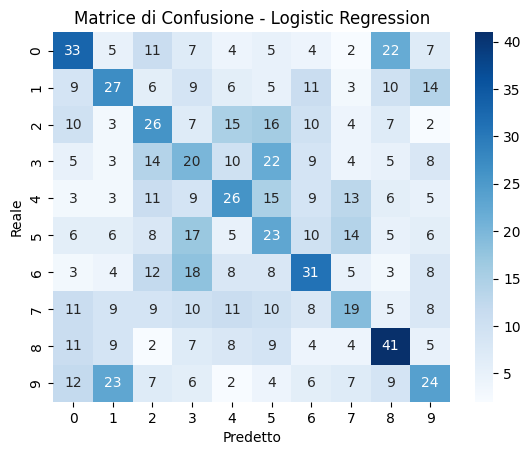

Accuracy di SVM: 0.286

Report di classificazione di SVM:
              precision    recall  f1-score   support

           0       0.31      0.41      0.35       100
           1       0.31      0.36      0.33       100
           2       0.22      0.28      0.25       100
           3       0.17      0.19      0.18       100
           4       0.31      0.31      0.31       100
           5       0.22      0.20      0.21       100
           6       0.34      0.29      0.31       100
           7       0.29      0.17      0.22       100
           8       0.45      0.39      0.42       100
           9       0.31      0.26      0.28       100

    accuracy                           0.29      1000
   macro avg       0.29      0.29      0.28      1000
weighted avg       0.29      0.29      0.28      1000



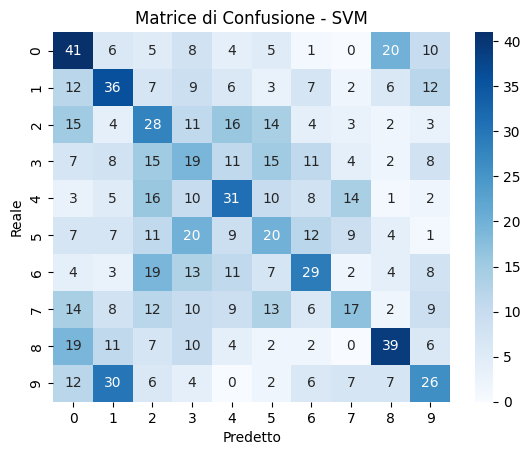

Accuracy di KNN: 0.274

Report di classificazione di KNN:
              precision    recall  f1-score   support

           0       0.26      0.52      0.35       100
           1       0.50      0.05      0.09       100
           2       0.20      0.41      0.27       100
           3       0.26      0.15      0.19       100
           4       0.21      0.45      0.29       100
           5       0.35      0.19      0.25       100
           6       0.21      0.18      0.19       100
           7       0.56      0.15      0.24       100
           8       0.38      0.52      0.44       100
           9       0.75      0.12      0.21       100

    accuracy                           0.27      1000
   macro avg       0.37      0.27      0.25      1000
weighted avg       0.37      0.27      0.25      1000



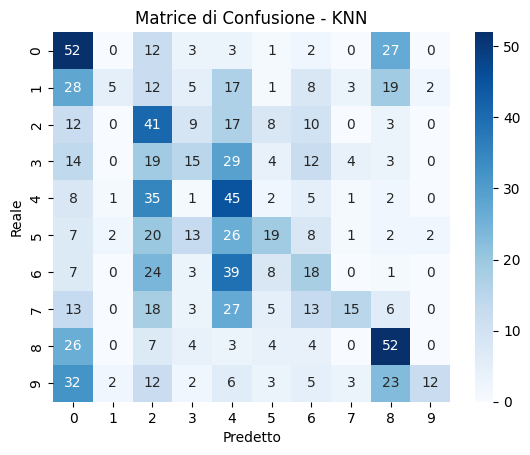

Accuracy di Decision Tree: 0.209

Report di classificazione di Decision Tree:
              precision    recall  f1-score   support

           0       0.31      0.30      0.31       100
           1       0.22      0.21      0.21       100
           2       0.16      0.20      0.18       100
           3       0.15      0.13      0.14       100
           4       0.21      0.21      0.21       100
           5       0.18      0.17      0.17       100
           6       0.14      0.14      0.14       100
           7       0.18      0.17      0.18       100
           8       0.27      0.33      0.30       100
           9       0.28      0.23      0.25       100

    accuracy                           0.21      1000
   macro avg       0.21      0.21      0.21      1000
weighted avg       0.21      0.21      0.21      1000



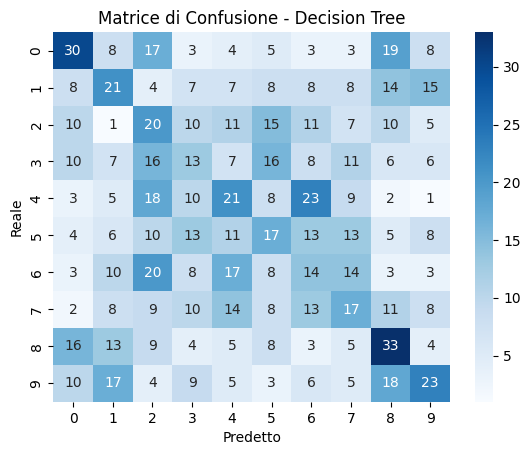

In [6]:
grid_searches = []
for nome, modello in modelli:
    grid_search = GridSearchCV(modello, param_grid[nome], cv=3,scoring = 'accuracy', n_jobs=-1, verbose = 1)
    grid_searches.append((nome, grid_search))

best_models = {}
for nome, grid_search in grid_searches:
    grid_search.fit(X_train_scaled, y_train_rid)
    best_models[nome] = grid_search.best_estimator_
    print(f"I migliori parametri per {nome} sono: {grid_search.best_params_}")

for nome, best_model in best_models.items():
    y_pred = best_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_rid, y_pred)
    print(f"Accuracy di {nome}: {accuracy}")
    print(f"\nReport di classificazione di {nome}:" )
    print(classification_report(y_test_rid, y_pred))
    cm = confusion_matrix(y_test_rid, y_pred, labels=best_model.classes_)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
    plt.title(f'Matrice di Confusione - {nome}')
    plt.xlabel('Predetto')
    plt.ylabel('Reale')
    plt.show()

#Sebbene l'accuratezza sia limitata (~40%), questo era atteso considerando la natura non ottimale dei modelli classici su dati immagine, 
#in particolare a seguito della perdita di struttura spaziale dovuta all'operazione di flattening."

In [7]:
param_grid_log = {
        'C': [1],
        'max_iter': [100],
    }
logistic_model = LogisticRegression(solver='liblinear', random_state=42)
grid_search_log = GridSearchCV(logistic_model, param_grid_log, cv=3,scoring = 'accuracy', n_jobs=-1, verbose = 1)
grid_search_log.fit(X_train_scaled, y_train_rid)
print(grid_search_log.best_params_)
print(grid_search_log.best_estimator_)
print(grid_search_log.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
{'C': 1, 'max_iter': 100}
LogisticRegression(C=1, random_state=42, solver='liblinear')
0.24379829916369666
